In [ ]:
# %pip install textwrap

In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import json
import textwrap

In [26]:
title_colors = {1: "blue", 0: "red"}

def checkImageRef(resultJson, dataJson):
    for _, (vid_id, vid_result) in enumerate(resultJson.items()):
        if vid_result:
            main_frame = 0
            for i, (frame_name, frame_result) in enumerate(vid_result.items()):
                if frame_result:
                    main_frame = frame_name
    
            obj_nums = len(vid_result[main_frame])
            fig, axes = plt.subplots(4, obj_nums, figsize=(4*obj_nums, 10), gridspec_kw={'wspace': 0.3, 'hspace': 1.1})
            plt.tight_layout(rect=[0.2, 0, 1, 1], pad=4.0)  # 왼쪽 공간 확보


            for i, (frame_name, frame_result) in enumerate(vid_result.items()):
                if frame_result:
                    for j, (obj_id, obj_result) in enumerate(frame_result.items()):
                        if obj_result != {}:
                            ref_exp = obj_result['ref_exp']
                            cat_name = obj_result['cat_name']
                            file_name = obj_result['file_name']
                            isValid = obj_result['isValid']

                            frame_indx = dataJson[vid_id]['frame_names'].index(frame_name)
                            video_path = dataJson[vid_id]['video_path']
                            frame_path = os.path.join(video_path, frame_name + '.jpg')
                            bbox = dataJson[vid_id]['annotations'][frame_indx][obj_id]['bbox']

                            frame = Image.open(frame_path).convert('RGB')
                            draw = ImageDraw.Draw(frame)
                            draw.rectangle(bbox, outline='red', width=7)

                            axes[i, j].imshow(frame, aspect="auto")
                            axes[i, j].axis('off')
                            pos = axes[i, j].get_position()
                            x = (pos.x0 + pos.x1) /2 

                            if i == 0 and j == 0:
                                frame_pos_x = x

                            y = pos.y0 - 0.1
                            wrapped_text = "\n".join(textwrap.wrap(ref_exp, width=30))
                            fig.text(x, y, wrapped_text, ha='center', fontsize=10, color=title_colors[isValid])
                
                pos = axes[i, j].get_position()
                x = frame_pos_x - 0.3
                y = (pos.y0 + pos.y1) / 2
                fig.text(x, y, frame_name, va="center", ha="center")

            fig.suptitle(vid_id, fontsize=16, x = 0.5, va='center', ha='center')
            plt.show()

In [12]:
with open('mbench/result.json', 'r') as file:
    resultJson = json.load(file)

with open('mbench/sampled_frame3.json', 'r') as file:
    dataJson = json.load(file)

/tmp/ipykernel_2516707/3726043313.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.2, 0, 1, 1], pad=4.0)  # 왼쪽 공간 확보


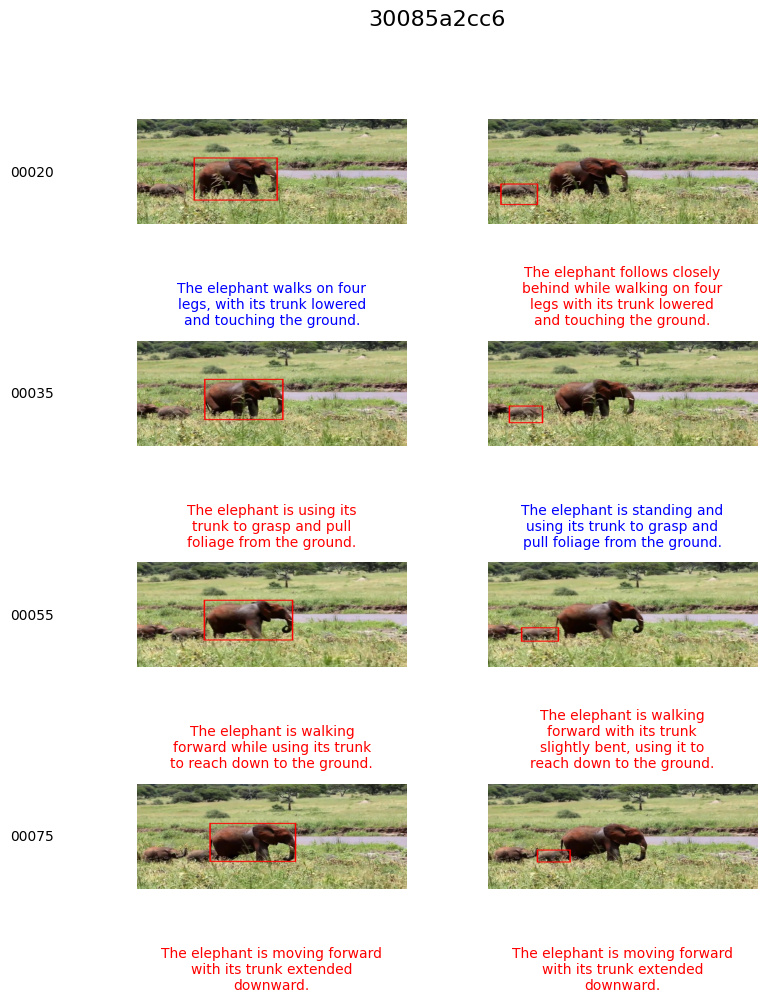

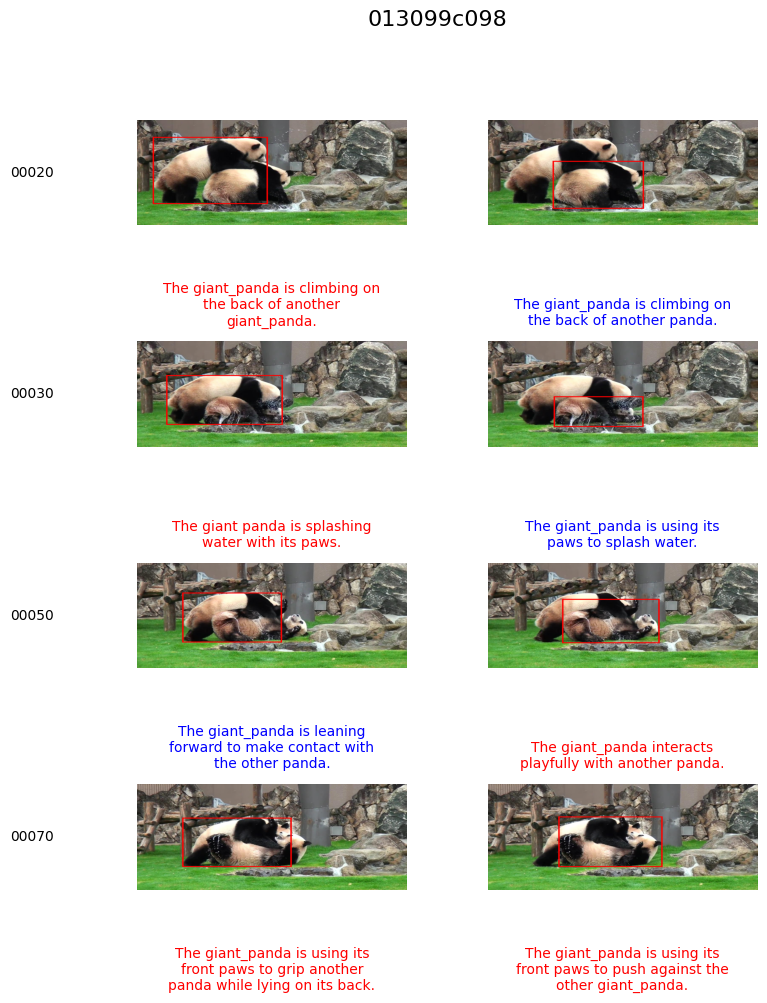

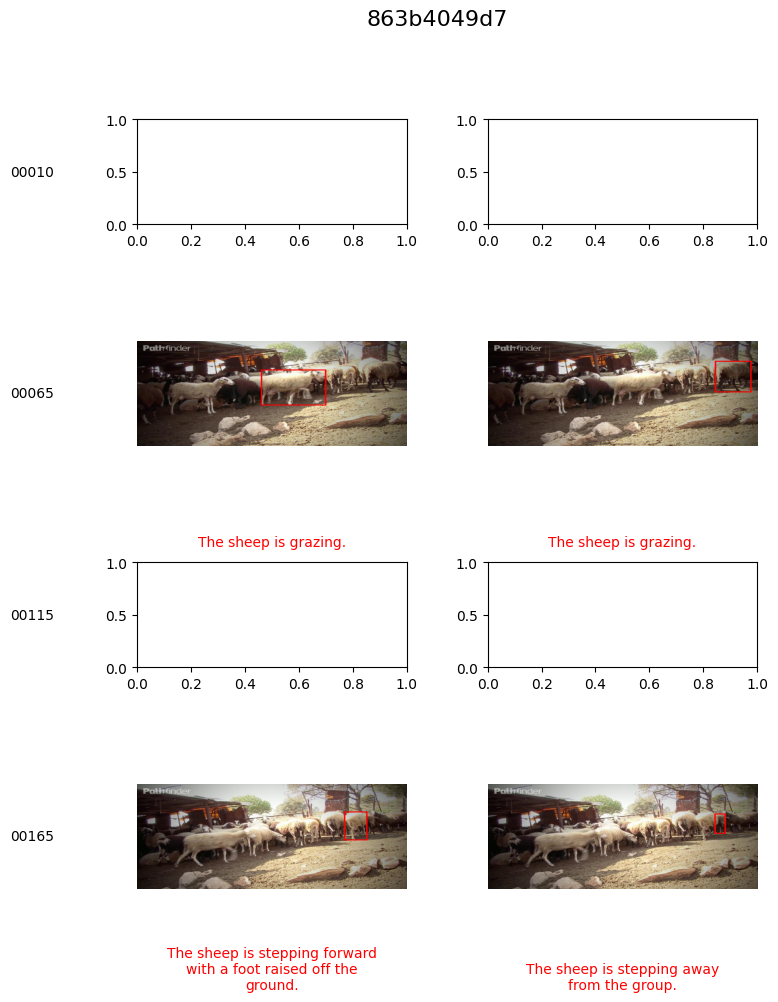

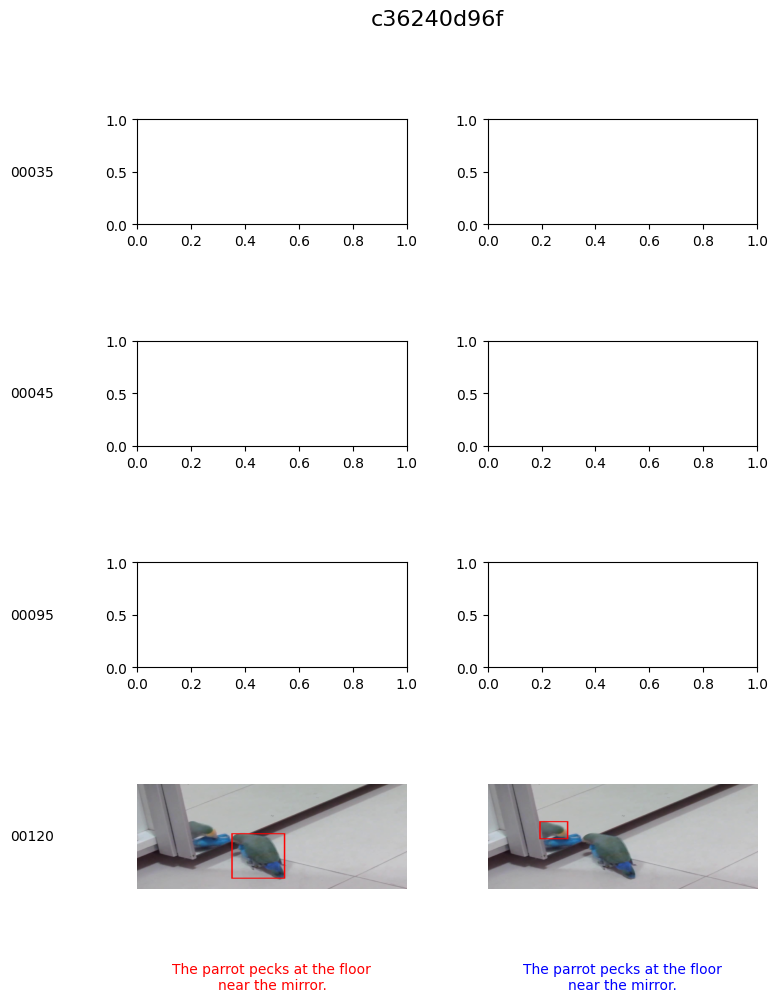

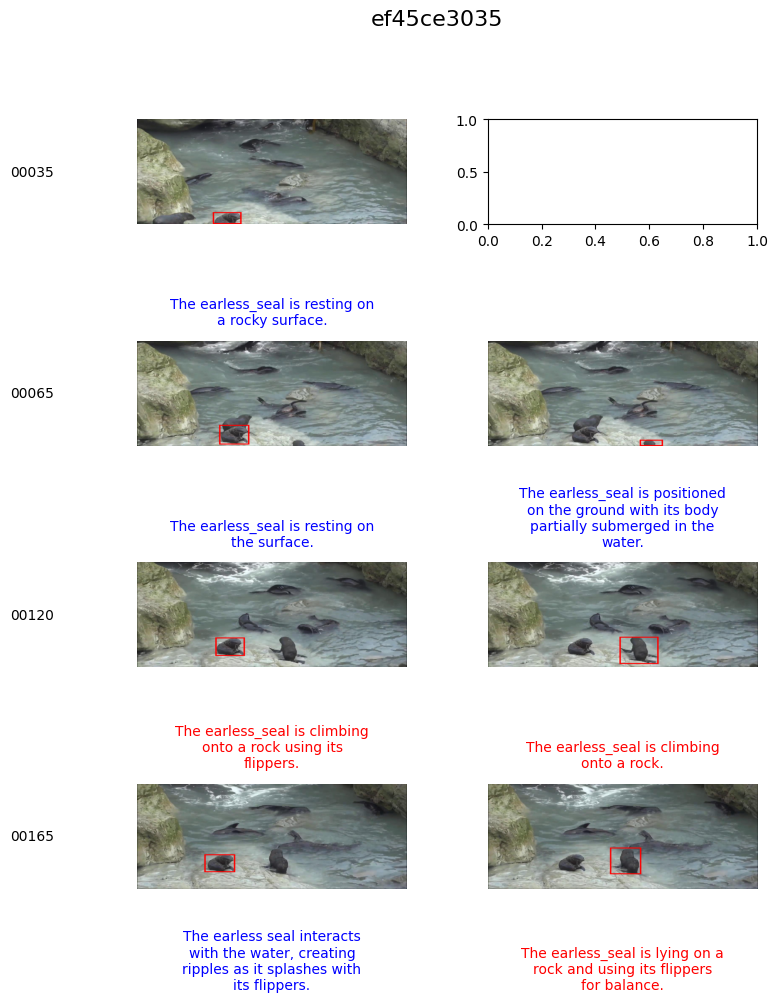

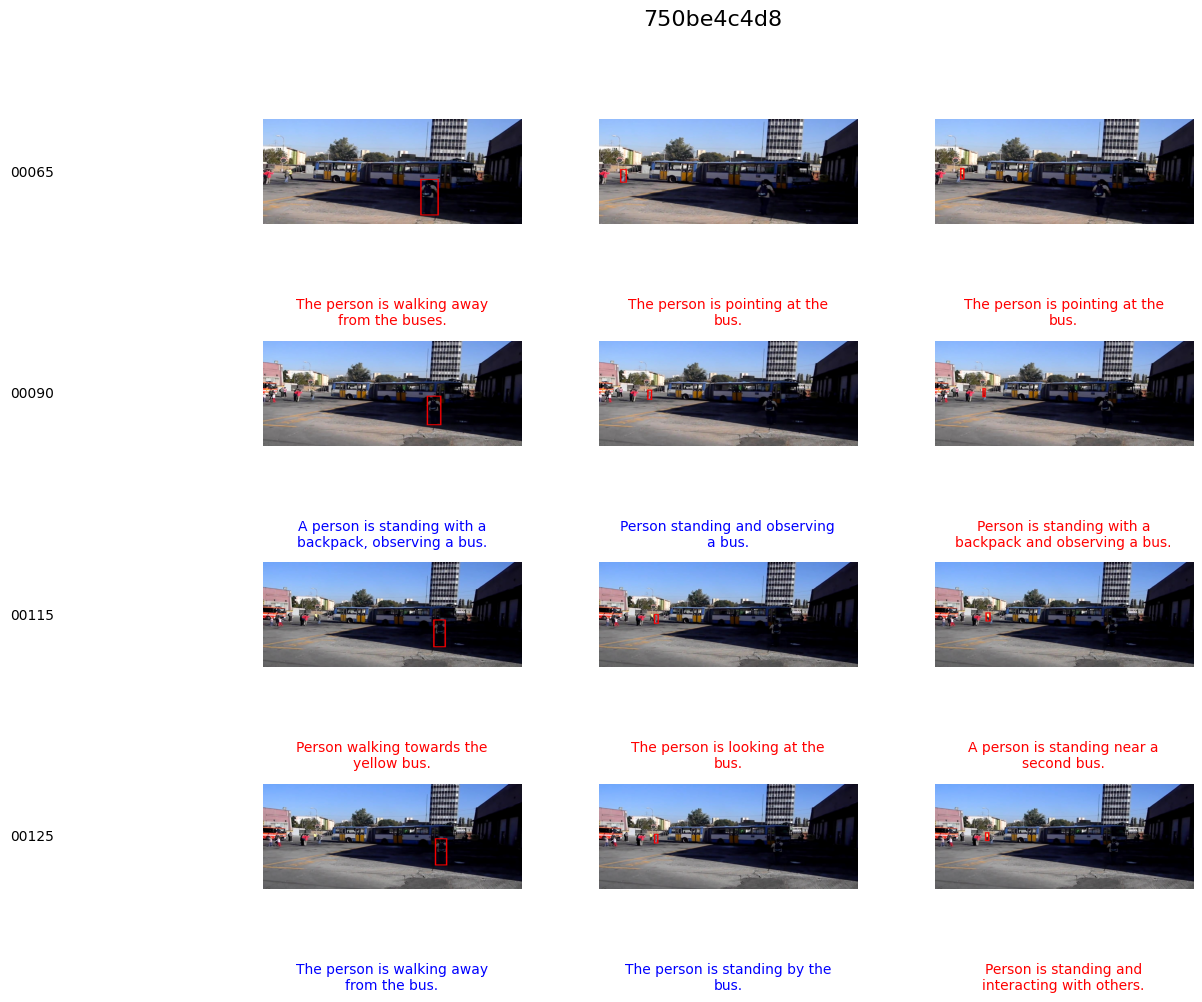

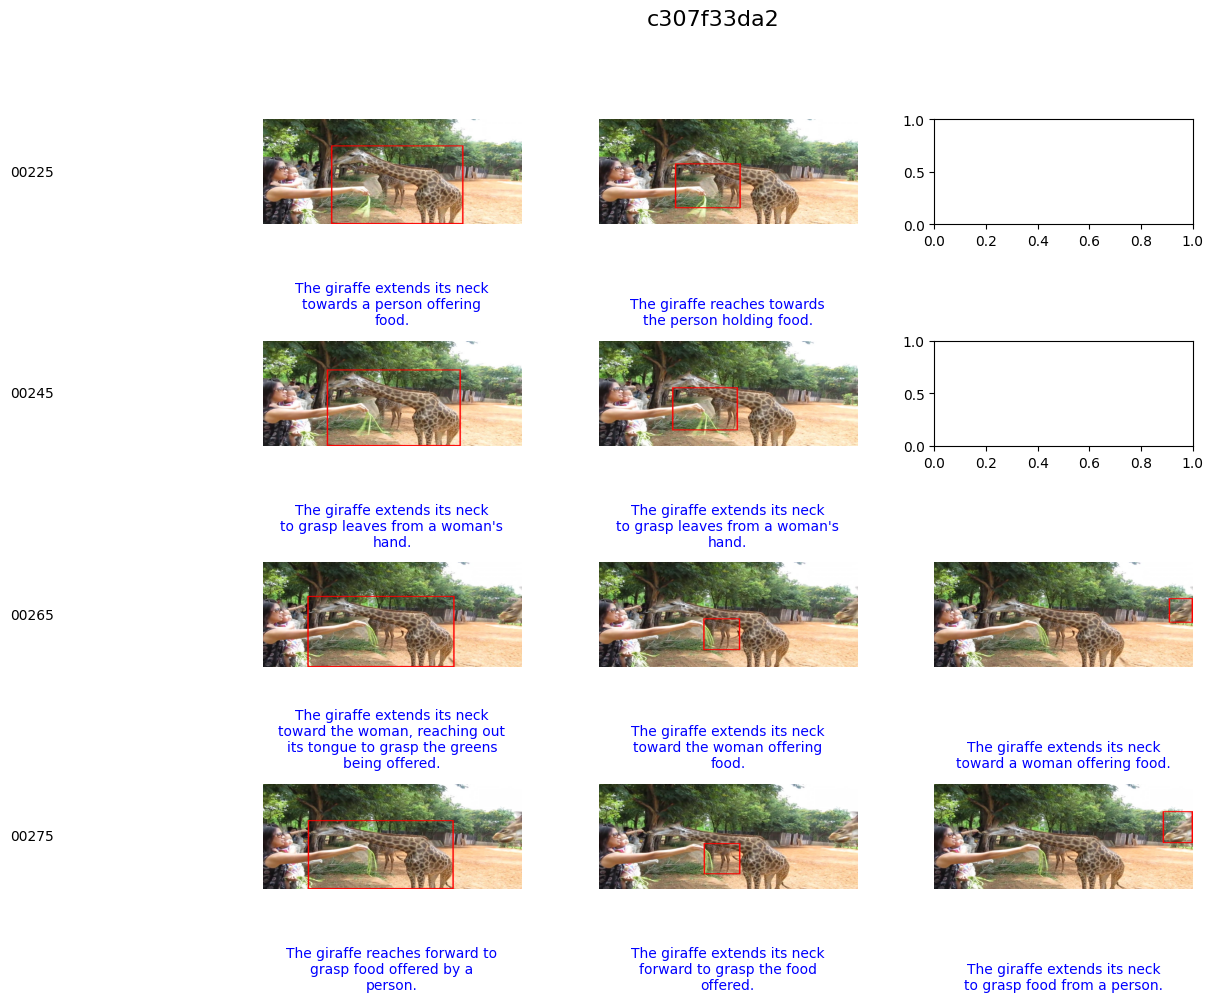

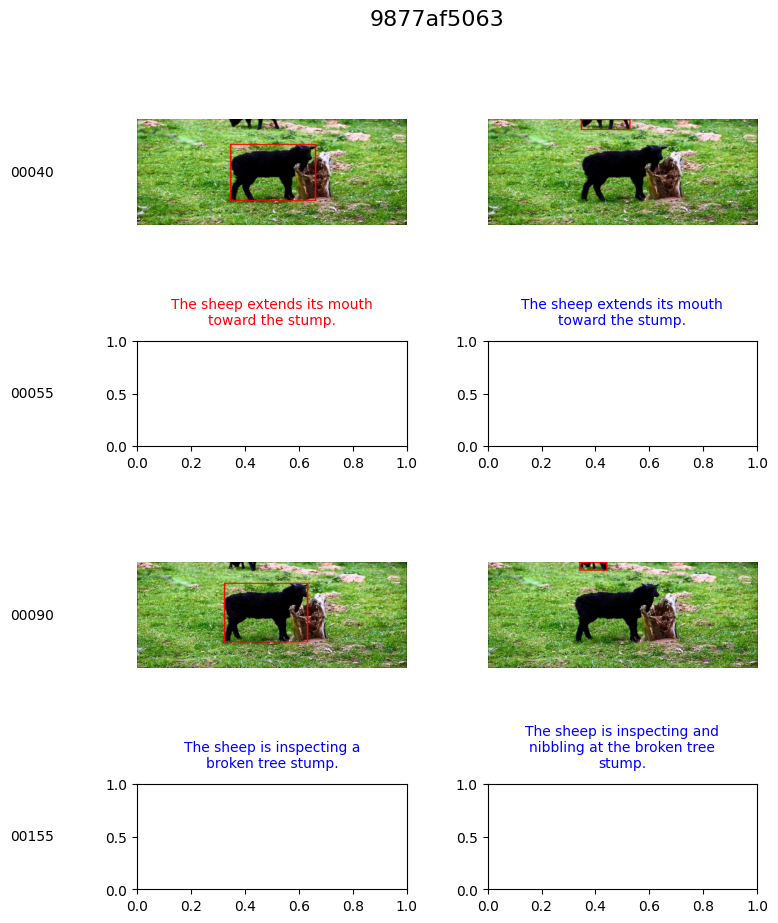

In [28]:
checkImageRef(resultJson, dataJson)